In [289]:
from statistics import correlation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [290]:
df = pd.read_csv('D:/PythonProject1/titanic/datas/Titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


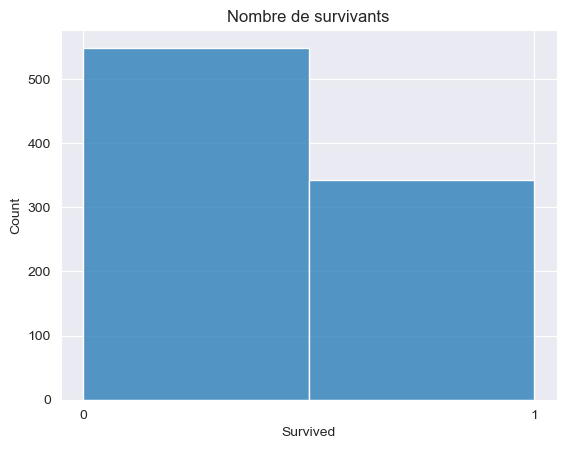

In [291]:
histo_survived = sns.histplot(df['Survived'], bins = 2)
histo_survived.set_xticks([0 ,1])
histo_survived.set_title('Nombre de survivants')
plt.show()


In [292]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


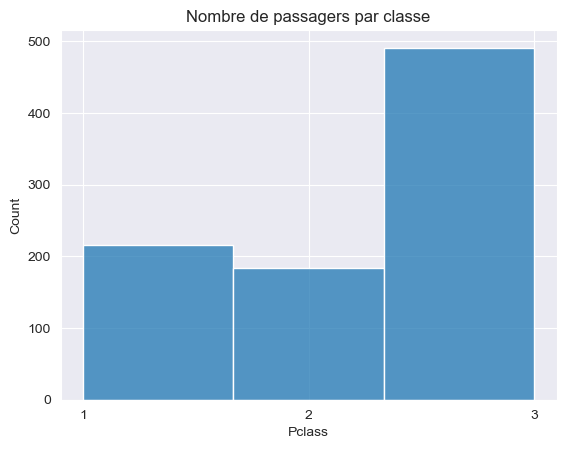

In [293]:
histo_pclass = sns.histplot(df['Pclass'], bins = 3)
histo_pclass.set_xticks([1, 2, 3])
histo_pclass.set_title('Nombre de passagers par classe')
plt.show()

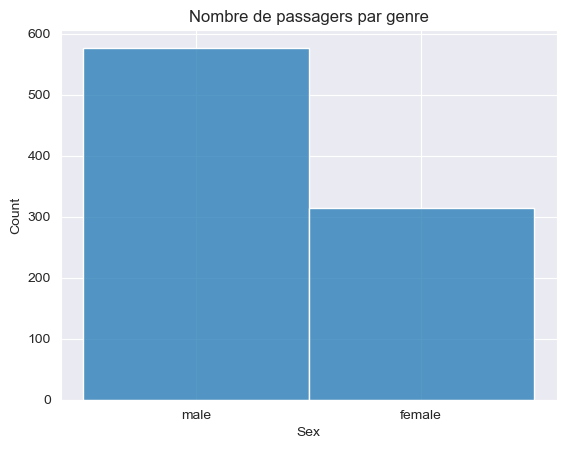

In [294]:
histo_genre = sns.histplot(df['Sex'], bins = 2)
histo_genre.set_xticks([0, 1])
histo_genre.set_title('Nombre de passagers par genre')
plt.show()

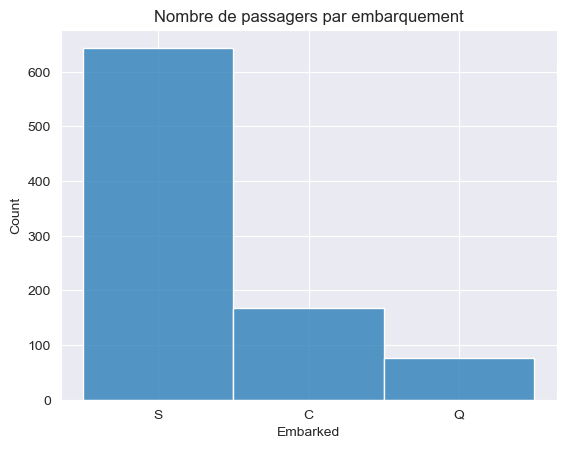

In [295]:
histo_embarked = sns.histplot(df['Embarked'], bins = 2)
histo_embarked.set_title('Nombre de passagers par embarquement')
plt.show()

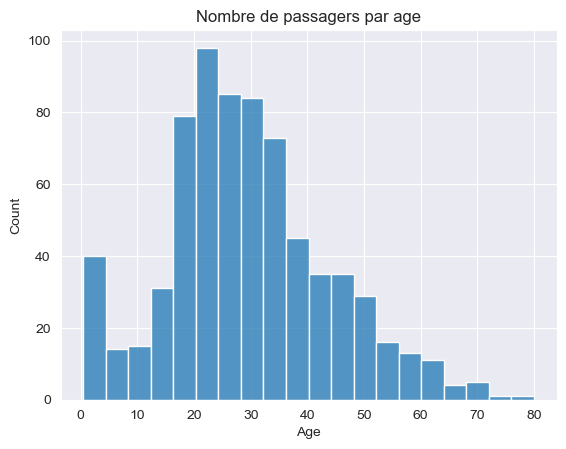

In [296]:
histo_age = sns.histplot(df['Age'])
histo_age.set_title('Nombre de passagers par age')
plt.show()

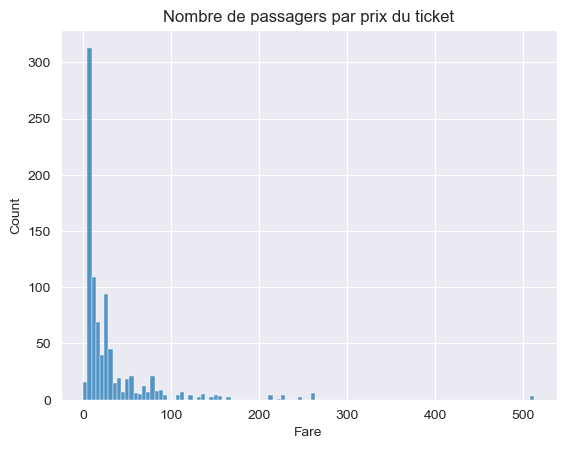

In [297]:
histo_age = sns.histplot(df['Fare'])
histo_age.set_title('Nombre de passagers par prix du ticket')
plt.show()

In [298]:
# correlation = df[['Survived', 'Age']].corr()
#
# plt.figure(figsize=(8,8))
# sns.heatmap(correlation, annot=True, cmap="coolwarm")
# plt.tight_layout()
# plt.show()

In [299]:
# correlation = df[['Survived', 'Pclass']].corr()
#
# plt.figure(figsize=(8,8))
# sns.heatmap(correlation, annot=True, cmap="coolwarm")
# plt.tight_layout()
# plt.show()

In [300]:
# df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
#
# df = df.apply(pd.to_numeric, errors='coerce')
#


In [301]:
# correlation = df[['Survived', 'Sex']].corr()
#
# plt.figure(figsize=(8,8))
# sns.heatmap(correlation, annot=True, cmap="coolwarm")
# plt.tight_layout()
# plt.show()

In [302]:
# # Sélectionner automatiquement toutes les colonnes numériques
# correlation = df.select_dtypes(include=[np.number]).corr()
#
# plt.figure(figsize=(9, 9))
# sns.heatmap(correlation,
#            annot=True,
#            cmap="coolwarm",
#            center=0,
#            square=True,
#            fmt='.2f')
# plt.title("Matrice de Corrélation Complète")
# plt.tight_layout()
# plt.show()

In [303]:
# Compter le nombre de colonnes null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Moyenne d'age

On va calculer la moyenne d'age pour remplcater les âges null + tard

In [304]:
# Calcul de la moyenne d'age (pour fix plus tard)
moyenne = df.loc[df['Age'].notna(), 'Age'].mean()
moyenne = round(moyenne)
print(f'La moyenne d\'age est de {moyenne} ans.')

La moyenne d'age est de 30 ans.


In [305]:
# Copier est données dans un autre df
df_clean = df

# copierla correction de l'age  dans le dataframe copié
df_clean['Age'] = df['Age'].fillna(moyenne)

# Recompter qu'il n'y a plus de colonne null
df_clean.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [306]:
df_clean.drop(['PassengerId', 'Name', 'Fare', 'Ticket', 'Cabin'], axis=1, inplace=True)

df_clean.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## Encoder les colonnes textuelles

Un modèle d'entrainement a besoin en général des données numériques

Donc les colonnes comme Sex, Embarked doivent être numériques

Donc on va utiliser OneHotEncoder pour transformer ces deux colonnes en version numérique



In [308]:
from sklearn.preprocessing import OneHotEncoder

# Créer la stratégie pour encoder colonnes textuelles
encoder = OneHotEncoder(drop = 'if_binary')

# Il va transformer les colonnes sex et embarked en num
cols_encoded = encoder.fit_transform(df_clean[['Sex', 'Embarked']])

# Il le fait dans une nouvelle copie en mémoire (pas encore un array)
# Nous on veut cette copie en array Numpy
cols_encoded_array = cols_encoded.toarray()

# car on veut insérer le nouveau array de colonnes transformées dans un DataFrame (numpy array obligatoire)
new_cols = np.array(cols_encoded_array)

In [309]:
print(new_cols[:5])

[[1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]]


In [310]:
labels = encoder.get_feature_names_out(['Sex', 'Embarked'])
print(labels)

['Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Embarked_nan']


## Fusionner toutes les colonnes

In [311]:
# Convertir le narray col_encoded_array en DataFrame
# Il faut s'imaginer qu'on crée un nouvel Excel en mémoire mais avec les colonnes ['Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Embarked_nan'] avec [[1. 0. 0. 1. 0.]
 #[0. 1. 0. 0. 0.]
df_cols_encoded = pd.DataFrame(cols_encoded_array, columns=labels)

# join = fusionner plusieurs DF (fusion de plusieurs Excel)
# Warning : par défaut join fait une copie
df_clean = df_clean.join(df_cols_encoded)

# Vérifier que les nouvelles colonnes ont été insérées
df_clean.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,male,22.0,1,0,S,1.0,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,C,0.0,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,S,0.0,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,S,0.0,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,S,1.0,0.0,0.0,1.0,0.0


## Re-supprimer les colonnes non numériques

On le fait pour le model d'entraînement

In [312]:
df_clean.drop(['Sex', 'Embarked'], axis=1, inplace=True)

df_clean.head(5)

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.0,1,0,1.0,0.0,0.0,1.0,0.0
1,1,1,38.0,1,0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,1.0,0.0,0.0,1.0,0.0


## Exporter en fichier csv

In [313]:
df_clean.to_csv('D:/PythonProject1/titanic/datas/titanic_clean.csv', index=False)